In [13]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [14]:
# Load the data
traffic_data = pd.read_csv('traffic.csv')

traffic_data.head()
traffic_data.tail()

,DateTime,Junction,Vehicles,ID
48115,6/30/2017 19:00,4,11,20170630194
48116,6/30/2017 20:00,4,30,20170630204
48117,6/30/2017 21:00,4,16,20170630214
48118,6/30/2017 22:00,4,22,20170630224
48119,6/30/2017 23:00,4,12,20170630234


# EDA

In [15]:
# Convert 'DateTime' to datetime object
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

missing_values = traffic_data.isnull().sum()

duplicates = traffic_data.duplicated().sum()

# Summary statistics for the 'Vehicles' column
vehicles_stats = traffic_data['Vehicles'].describe()

missing_values, duplicates, vehicles_stats

(DateTime    0
 Junction    0
 Vehicles    0
 ID          0
 dtype: int64,
 0,
 count    48120.000000
 mean        22.791334
 std         20.750063
 min          1.000000
 25%          9.000000
 50%         15.000000
 75%         29.000000
 max        180.000000
 Name: Vehicles, dtype: float64)

# Visualization

# Create a histogram of the Vehicles column

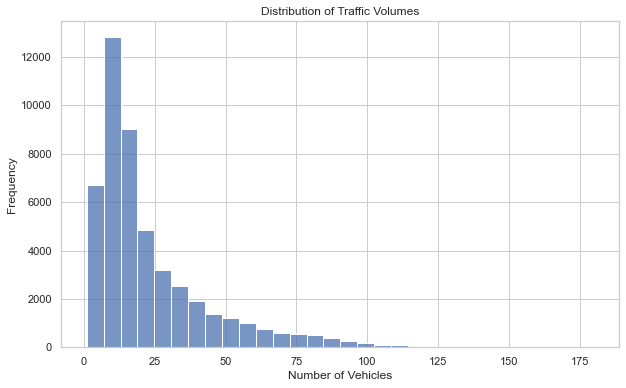

In [16]:
# Set the style of seaborn

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(traffic_data['Vehicles'], kde=False, bins=30)
plt.title('Distribution of Traffic Volumes')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

# Create a line plot of traffic volume over time
- For better readability, resample the data by day and take the mean

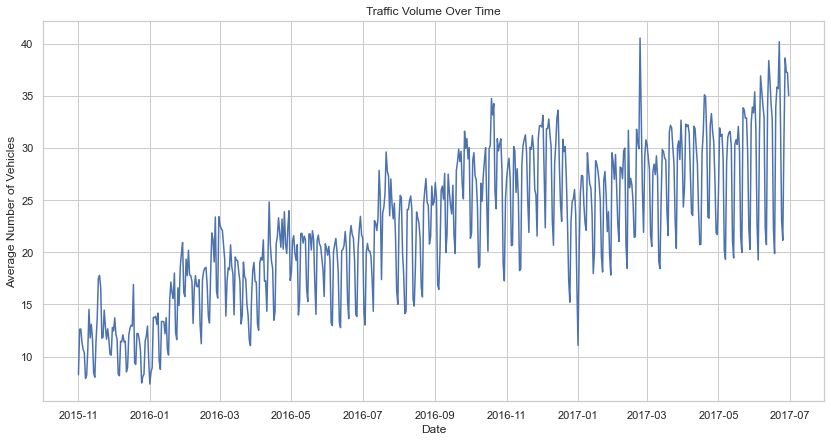

In [17]:
plt.figure(figsize=(14, 7))
traffic_data_resampled = traffic_data.set_index('DateTime').resample('D').mean()
sns.lineplot(data=traffic_data_resampled, x=traffic_data_resampled.index, y='Vehicles')
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Vehicles')
plt.show()

# Create boxplots to compare traffic volumes across different junctions

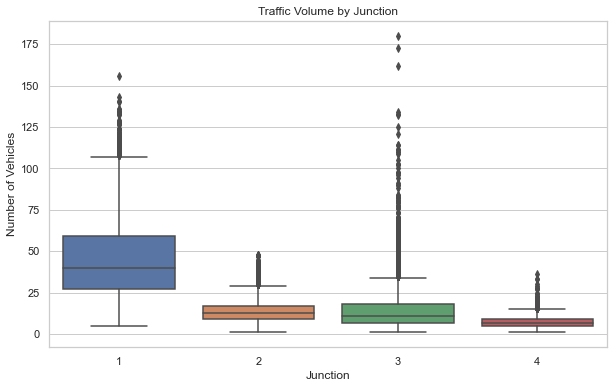

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Junction', y='Vehicles', data=traffic_data)
plt.title('Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Number of Vehicles')
plt.show()

# Identifying peak traffic hours and analyzing traffic patterns by the day of the week

In [19]:
# Create new columns for hour of the day and day of the week

traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.day_name()

In [20]:
# Aggregate data to find mean traffic volume for each hour of the day

hourly_traffic = traffic_data.groupby('HourOfDay')['Vehicles'].mean().reset_index()

# Aggregate data to find mean traffic volume for each day of the week

weekly_traffic = traffic_data.groupby('DayOfWeek')['Vehicles'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

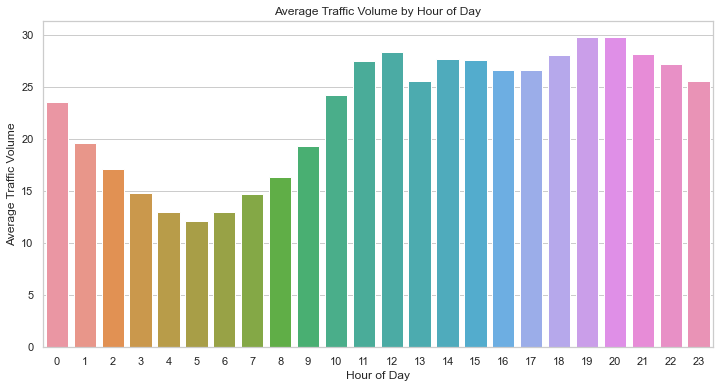

In [21]:
# Plotting the hourly traffic volume

plt.figure(figsize=(12, 6))
sns.barplot(x='HourOfDay', y='Vehicles', data=hourly_traffic)
plt.title('Average Traffic Volume by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Traffic Volume')
plt.xticks(np.arange(0, 24, 1))
plt.show()

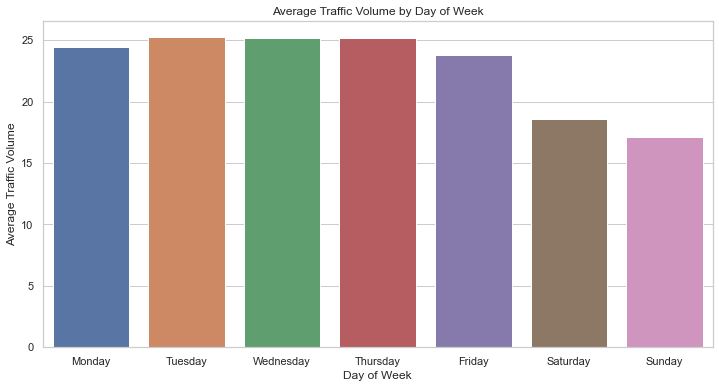

In [22]:
# Plotting the daily traffic volume

plt.figure(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='Vehicles', data=weekly_traffic)
plt.title('Average Traffic Volume by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Traffic Volume')
plt.show()

# Peak Hours Identification

- Identify peak and off-peak hours for each junction, which could be crucial for traffic management and planning.

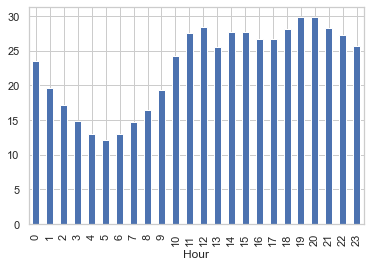

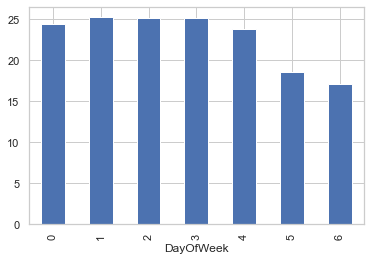

<Figure size 1080x432 with 0 Axes>

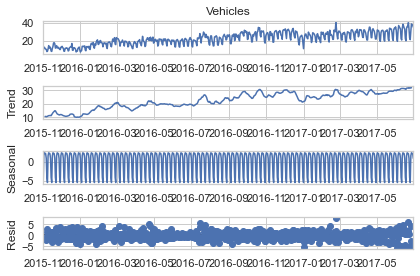

In [25]:
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['Hour'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Peak Hour Analysis

avg_traffic_by_hour = traffic_data.groupby('Hour')['Vehicles'].mean()
avg_traffic_by_hour.plot(kind='bar')
plt.show()

# Day of the Week Analysis

avg_traffic_by_day = traffic_data.groupby('DayOfWeek')['Vehicles'].mean()
avg_traffic_by_day.plot(kind='bar')
plt.show()

# Time Series Decomposition

traffic_data_daily = traffic_data.set_index('DateTime').resample('D').mean()
decomposition = seasonal_decompose(traffic_data_daily['Vehicles'], model='additive')
plt.figure(figsize=(15,6))
decomposition.plot()
plt.show()

# Correlation Analysis 

- Examine if there's a correlation between time of day or specific days and traffic volumes

In [26]:
traffic_data = pd.read_csv('traffic.csv')

# Convert 'DateTime' to datetime and create new time-related features
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])
traffic_data['HourOfDay'] = traffic_data['DateTime'].dt.hour
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate the correlation matrix
correlation_matrix = traffic_data[['HourOfDay', 'DayOfWeek', 'Vehicles']].corr()

print(correlation_matrix)

              HourOfDay     DayOfWeek  Vehicles
HourOfDay  1.000000e+00  6.442124e-18  0.219938
DayOfWeek  6.442124e-18  1.000000e+00 -0.126027
Vehicles   2.199377e-01 -1.260265e-01  1.000000


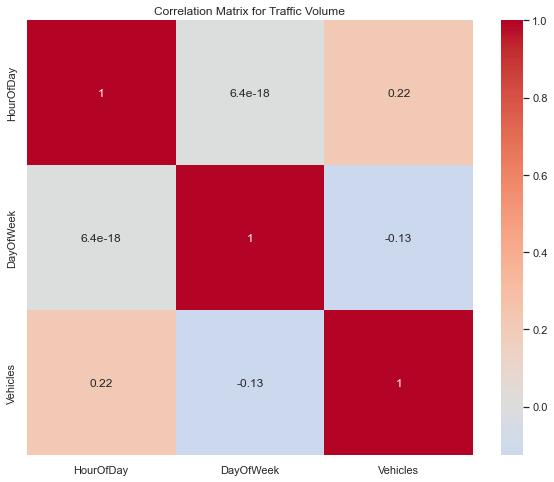

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Traffic Volume')
plt.show()

# Day of Week Analysis

- Determine how traffic volumes vary by day of the week, which might reflect commuter and commercial traffic patterns

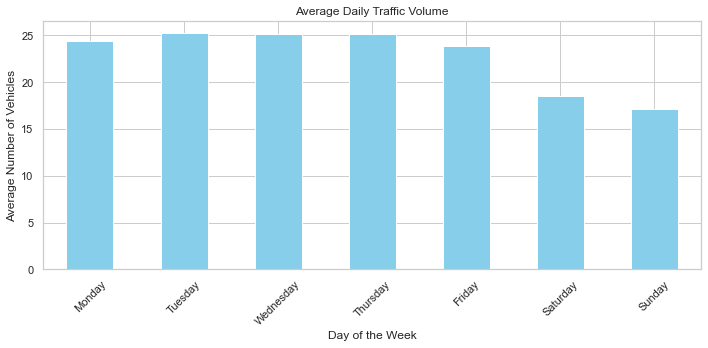

In [28]:
traffic_data = pd.read_csv('traffic.csv')

traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Extract the day of the week from 'DateTime' (Monday=0, Sunday=6)
traffic_data['DayOfWeek'] = traffic_data['DateTime'].dt.dayofweek

# Group by 'DayOfWeek' and calculate the mean number of vehicles
average_traffic_by_day = traffic_data.groupby('DayOfWeek')['Vehicles'].mean()

# Create a mapping from day numbers to names for better readability
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
             4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
average_traffic_by_day.index = average_traffic_by_day.index.map(day_names)


plt.figure(figsize=(10, 5))
average_traffic_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Daily Traffic Volume')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Vehicles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Holiday Effects 

- Assess how public holidays and other significant days affect traffic volumes

In [29]:
# Sample list of public holiday dates in the 'YYYY-MM-DD' format
public_holidays = ['2016-01-01', '2016-07-04', '2016-12-25'] # as an example


public_holidays = pd.to_datetime(public_holidays)

# Mark the holidays in the traffic data
traffic_data['IsHoliday'] = traffic_data['DateTime'].dt.date.isin(public_holidays.date)

# Group by the holiday marker
holiday_traffic = traffic_data.groupby('IsHoliday')['Vehicles'].mean().reset_index()

# holiday_traffic will give you a DataFrame with average traffic volumes on holidays vs. non-holidays

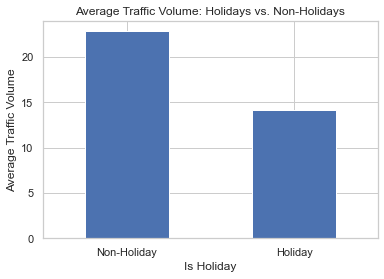

In [30]:
# Step 1: Define a hypothetical list of public holiday dates
public_holidays = ['2016-01-01', '2016-07-04', '2016-12-25']  # Hypothetical holidays

# Convert holiday dates to datetime
public_holidays = pd.to_datetime(public_holidays)

# Step 2: Create a holiday indicator in the traffic data
traffic_data['IsHoliday'] = traffic_data['DateTime'].dt.normalize().isin(public_holidays)

# Step 3: Calculate the average traffic volumes for holidays and non-holidays
holiday_traffic = traffic_data.groupby('IsHoliday')['Vehicles'].mean()

# Step 4: Visualization
holiday_traffic.plot(kind='bar')
plt.title('Average Traffic Volume: Holidays vs. Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Traffic Volume')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()

# Junction Comparison

- Compare traffic trends between junctions to see if some are consistently busier than others or if they experience traffic volume peaks at different times.

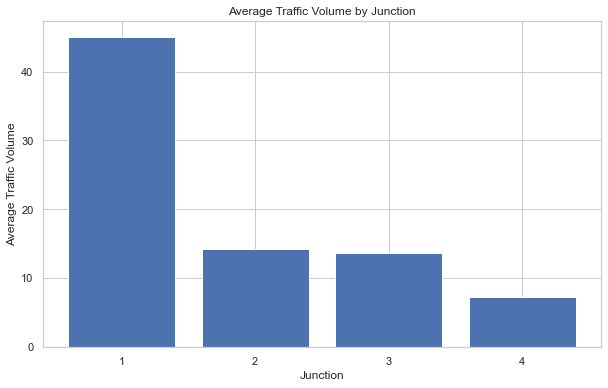

In [31]:
traffic_data = pd.read_csv('traffic.csv')

# Convert 'DateTime' to a datetime object for easier manipulation
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])

# Group the data by 'Junction' and calculate the average 'Vehicles'
junction_comparison = traffic_data.groupby('Junction')['Vehicles'].mean().reset_index()

# Plotting the average traffic volume by junction
plt.figure(figsize=(10, 6))
plt.bar(junction_comparison['Junction'], junction_comparison['Vehicles'])
plt.title('Average Traffic Volume by Junction')
plt.xlabel('Junction')
plt.ylabel('Average Traffic Volume')
plt.xticks(junction_comparison['Junction'])
plt.show()

In [32]:
avg_traffic_by_junction = traffic_data.groupby('Junction')['Vehicles'].mean()
avg_traffic_by_junction

Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64